In [44]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

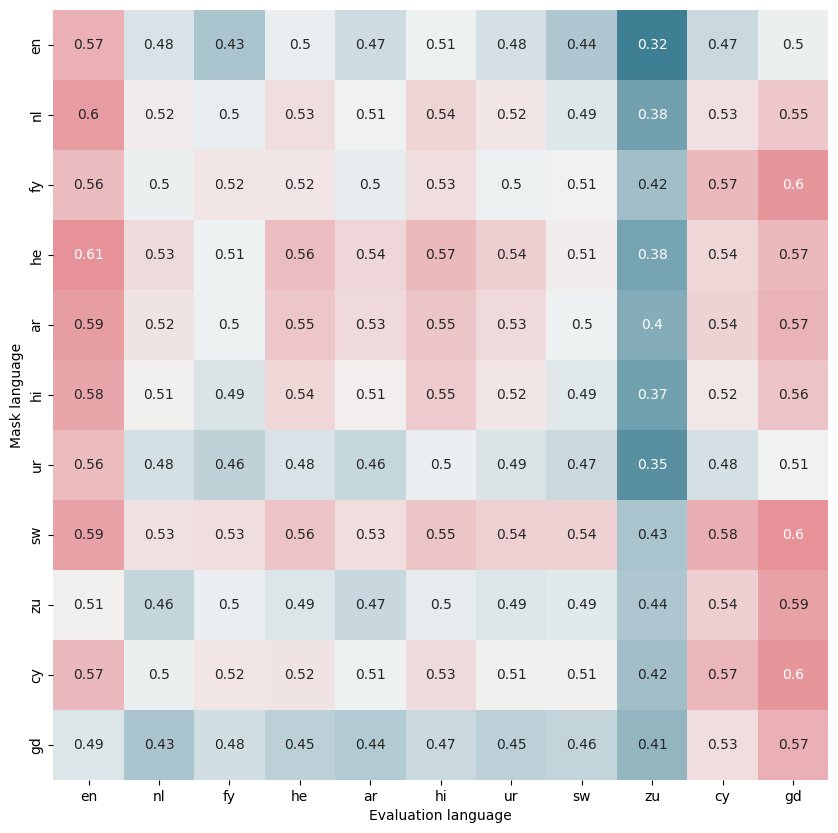

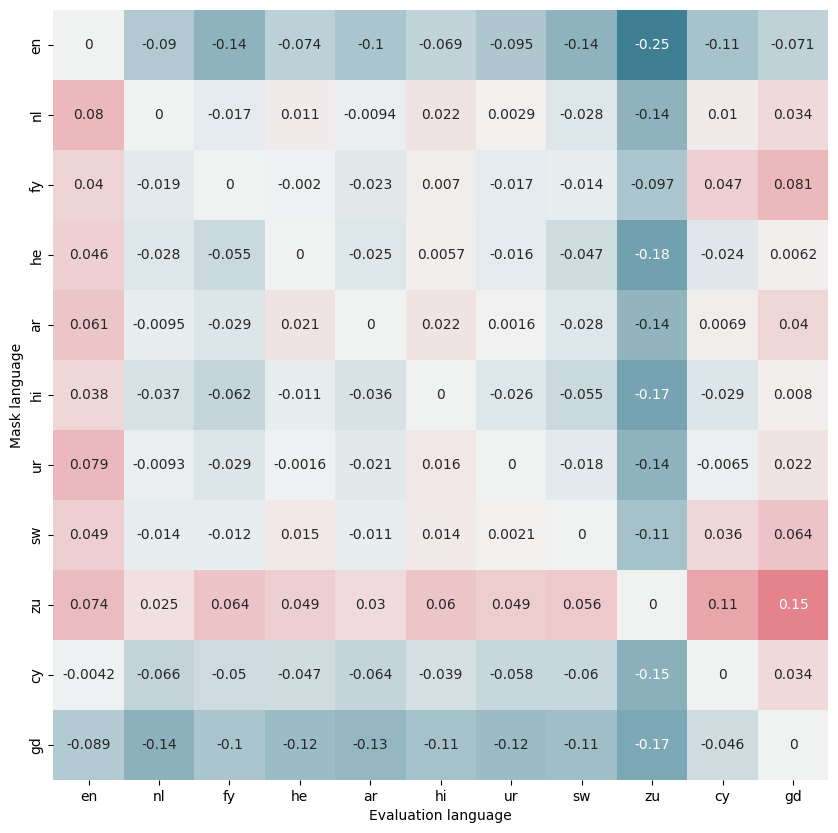

In [45]:
# Structure of results are files with the following format:
# filename: {mask_language}_{eval_language}.json
# content: {"accuracy": accuracy.item(), "perplexity": perplexity.item()}
# One of the mask languages is 'None', which means no pruning was done

# Load results
results = {}
for filename in os.listdir('../results_cross'):
    if filename.endswith('.json'):
        with open(os.path.join('../results_cross', filename), 'r') as f:
            results[filename[:-5]] = json.load(f)

# Create a matrix of accuracies
languages = ['en', 'nl', 'fy', 'he', 'ar', 'hi', 'ur', 'sw', 'zu', 'cy', 'gd']
# mask_languages = ['None', 'en', 'nl', 'fy', 'he', 'ar', 'hi', 'ur', 'sw', 'zu', 'cy', 'gd']
accuracies = np.zeros((len(languages), len(languages)))
for i, mask_language in enumerate(languages):
    for j, eval_language in enumerate(languages):
        accuracies[i, j] = results[f'{mask_language}_{eval_language}']['accuracy']

# Get the absolute difference for each evaluation compared to the mask on its own language
accuracies_diff = np.zeros((len(languages), len(languages)))
for i, mask_language in enumerate(languages):
    for j, eval_language in enumerate(languages):
        accuracies_diff[i, j] = accuracies[i, j] - accuracies[i, i]

# Plot the matrix
# mask_languages_labels = ['No mask' if mask_language == 'None' else mask_language for mask_language in mask_languages]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, sep=1, as_cmap=True)
# Center is average accuracy
center = np.mean(accuracies)
sns.heatmap(accuracies, annot=True, xticklabels=languages, yticklabels=languages, ax=ax, cmap=cmap, center=center)
plt.xlabel('Evaluation language')
plt.ylabel('Mask language')
ax.collections[0].colorbar.remove()
plt.savefig('figures/cross_evaluation_accuracy_absolute.png')
plt.show()


# Plot the difference matrix
fig, ax = plt.subplots(figsize=(10, 10))
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Make colors more pronounced
cmap = sns.diverging_palette(220, 10, sep=1, as_cmap=True)

# sns.heatmap(accuracies_diff, annot=True, xticklabels=languages, yticklabels=languages, ax=ax)
# Make zero values white, positive values green and negative values red
sns.heatmap(accuracies_diff, annot=True, xticklabels=languages, yticklabels=languages, ax=ax, cmap=cmap, center=0)
plt.xlabel('Evaluation language')
plt.ylabel('Mask language')
ax.collections[0].colorbar.remove()
plt.savefig('figures/cross_evaluation_accuracy_difference.png')
plt.show()

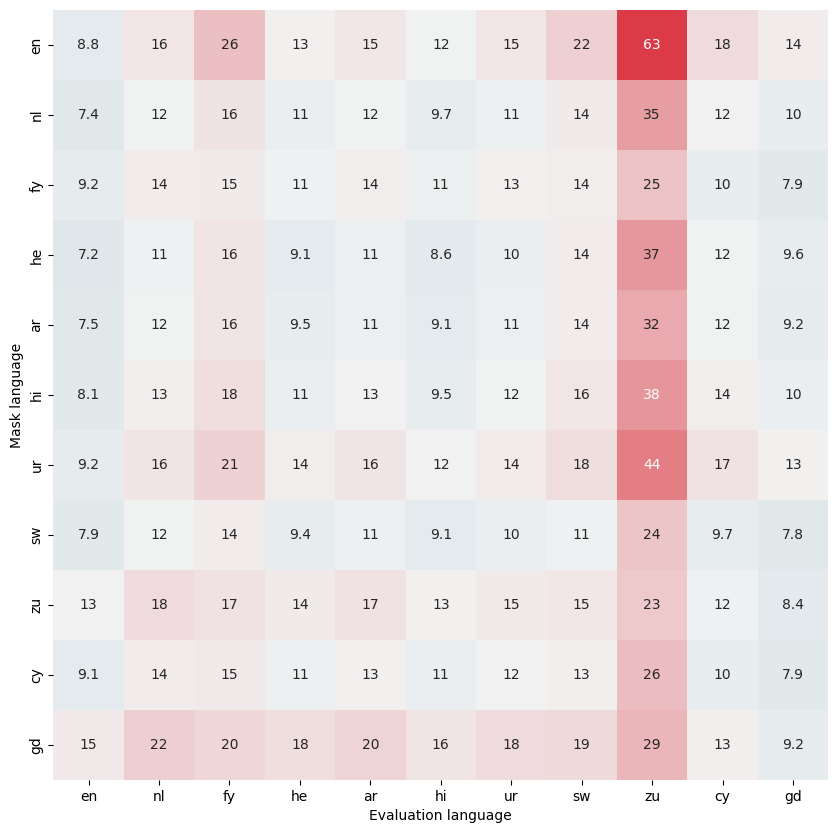

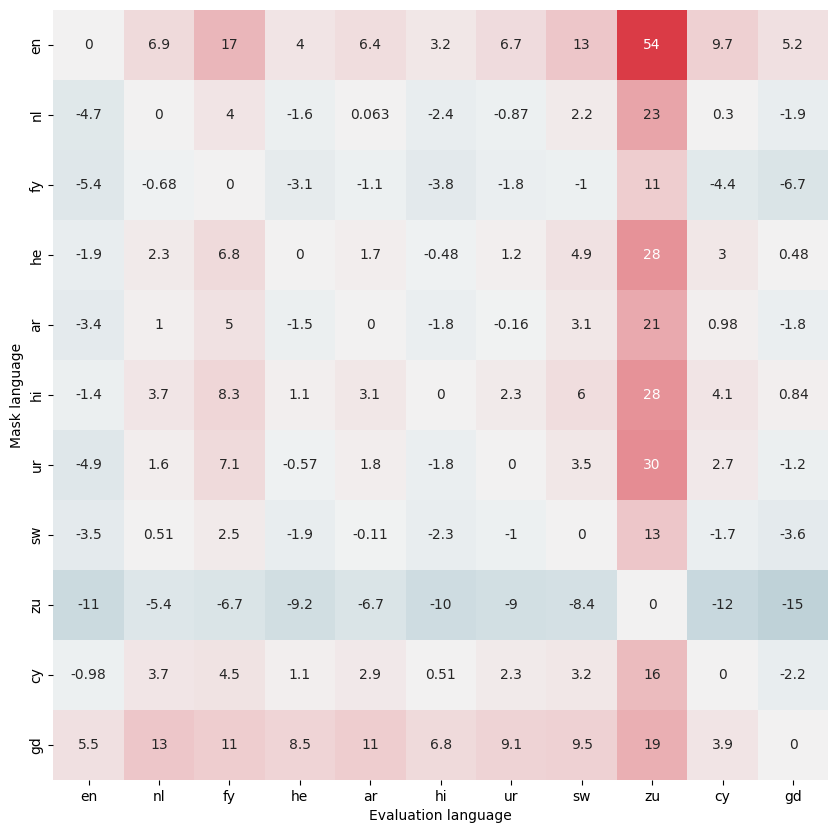

In [46]:
perplexities = np.zeros((len(languages), len(languages)))
for i, mask_language in enumerate(languages):
    for j, eval_language in enumerate(languages):
        perplexities[i, j] = results[f'{mask_language}_{eval_language}']['perplexity']

perplexities_diff = np.zeros((len(languages), len(languages)))
for i, mask_language in enumerate(languages):
    for j, eval_language in enumerate(languages):
        perplexities_diff[i, j] = perplexities[i, j] - perplexities[i, i]

fig, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, sep=1, as_cmap=True)
# Center is average of diagonal
center = np.mean(np.diag(perplexities))
sns.heatmap(perplexities, annot=True, xticklabels=languages, yticklabels=languages, ax=ax, cmap=cmap, center=center)
plt.xlabel('Evaluation language')
plt.ylabel('Mask language')
ax.collections[0].colorbar.remove()
plt.savefig('figures/cross_evaluation_perplexity_absolute.png')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, sep=1, as_cmap=True)
sns.heatmap(perplexities_diff, annot=True, xticklabels=languages, yticklabels=languages, ax=ax, cmap=cmap, center=0)
plt.xlabel('Evaluation language')
plt.ylabel('Mask language')
ax.collections[0].colorbar.remove()
plt.savefig('figures/cross_evaluation_perplexity_difference.png')
plt.show()

# Caption for the paper:
# Cross-evaluation results for the XLM-RoBERTa model. The accuracy and perplexity are shown for each language pair. The
# accuracy is the accuracy of the model on the evaluation language, while the perplexity is the perplexity of the model
# on the evaluation language. The accuracy and perplexity are shown for the model trained on the evaluation language
# (diagonal), and for the model trained on the evaluation language with the mask language pruned (off-diagonal). The
# accuracy and perplexity are shown for the model trained on the evaluation language (diagonal), and for the model

In [47]:

# Get the results for mask None 
accuracies_none = np.zeros(len(languages))
for i, eval_language in enumerate(languages):
    accuracies_none[i] = results[f'None_{eval_language}']['accuracy']

# Get the results for mask None
perplexities_none = np.zeros(len(languages))
for i, eval_language in enumerate(languages):
    perplexities_none[i] = results[f'None_{eval_language}']['perplexity']

# Get the best accuracy for each language
best_accuracies = np.zeros(len(languages))
for i, eval_language in enumerate(languages):
    best_accuracies[i] = np.max(accuracies[:, i])

# Get the best perplexity for each language
best_perplexities = np.zeros(len(languages))
for i, eval_language in enumerate(languages):
    best_perplexities[i] = np.min(perplexities[:, i])

# Get the accuracy for each language when masked on its own language
accuracies_self = np.diag(accuracies)

# Get the perplexity for each language when masked on its own language
perplexities_self = np.diag(perplexities)

# Create latex table with languages as rows and columns: No mask, Own mask, Best mask for both accuracy and perplexity

# Table header
print('\\begin{tabular}{l|c|c|c|c|c|c|c|c|c|c|c|c}')
# Header with Language, accuracy for 3 columns, perplexity for 3 columns
print('Language & \\multicolumn{3}{c|}{Accuracy} & \\multicolumn{3}{c}{Perplexity} \\\\')
# Header with No mask, Own mask, Best mask
print('& No mask & Own mask & Best mask & No mask & Own mask & Best mask \\\\')
# Header with empty cells
# Table content
for i, language in enumerate(languages):
    # Language
    print(f'{language} & ', end='')
    # Accuracy
    print(f'{accuracies_none[i]:.2f} & {accuracies_self[i]:.2f} & {best_accuracies[i]:.2f} & ', end='')
    # Perplexity
    print(f'{perplexities_none[i]:.2f} & {perplexities_self[i]:.2f} & {best_perplexities[i]:.2f} \\\\')

# Table footer
print('\\end{tabular}')



\begin{tabular}{l|c|c|c|c|c|c|c|c|c|c|c|c}
Language & \multicolumn{3}{c|}{Accuracy} & \multicolumn{3}{c}{Perplexity} \\
& No mask & Own mask & Best mask & No mask & Own mask & Best mask \\
en & 0.64 & 0.57 & 0.61 & 5.82 & 8.75 & 7.21 \\
nl & 0.58 & 0.52 & 0.53 & 8.51 & 12.11 & 11.47 \\
fy & 0.58 & 0.52 & 0.53 & 9.89 & 14.58 & 13.87 \\
he & 0.61 & 0.56 & 0.56 & 6.84 & 9.12 & 9.12 \\
ar & 0.59 & 0.53 & 0.54 & 7.91 & 10.97 & 10.86 \\
hi & 0.62 & 0.55 & 0.57 & 6.55 & 9.49 & 8.64 \\
ur & 0.61 & 0.49 & 0.54 & 7.16 & 14.10 & 10.34 \\
sw & 0.60 & 0.54 & 0.54 & 8.22 & 11.39 & 11.39 \\
zu & 0.49 & 0.44 & 0.44 & 17.37 & 23.48 & 23.48 \\
cy & 0.64 & 0.57 & 0.58 & 6.98 & 10.10 & 9.74 \\
gd & 0.66 & 0.57 & 0.60 & 5.91 & 9.20 & 7.82 \\
\end{tabular}
